In [1]:
import pandas as pd

In [5]:
def get_data(car_maker):
    df = pd.read_csv('norway_new_car_sales_by_make.csv')
    df['Date'] = pd.to_datetime(df['Year'].astype(str)+df['Month'].astype(str), format='%Y%m')
    df = (df.loc[df['Make'] == car_maker, ['Date','Quantity']].rename(columns={'Quantity':'Sales'}).set_index('Date'))
    return df
df = get_data('Toyota')
df = df.iloc[1:]

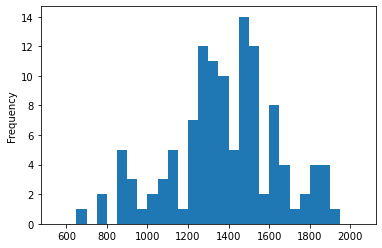

In [7]:
df['Sales'].plot(kind='hist', density=False, bins=30, range=(550,2050))

### Gaussian Kernel Density Estimator

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde


# Bandwidth Scott
kde_dist = gaussian_kde(df['Sales'], bw_method='scott')



In [16]:
# Scott 90% rule of thumb
scott_bw = 1/(df['Sales'].count()**(1/5))
bw=0.9
kde_dist = gaussian_kde(df['Sales'], bw_method=bw)

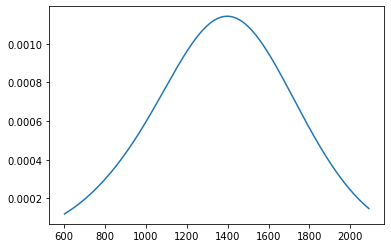

In [18]:
# plot
x=np.linspace(df['Sales'].min()*0.9, df['Sales'].max()*1.1,1000)
y_kde = kde_dist.pdf(x)

plt.plot(x,y_kde)

In [19]:
# Gaussaian KDE CDF 

print(kde_dist.integrate_box_1d(-np.inf,1250))

0.3514238531619694


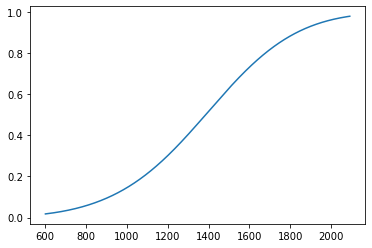

In [21]:
# Gaussian KDE for array Cumulative

def kde_cdf(kde_dist, x):
    cdf = []
    for value in x:
        cdf.append(kde_dist.integrate_box_1d(-np.inf, value))
    return cdf

plt.plot(x,kde_cdf(kde_dist,x))

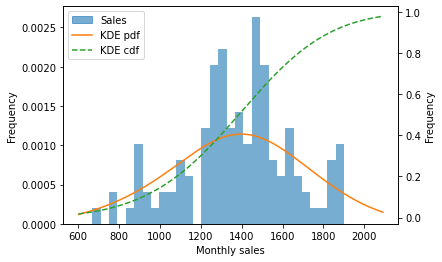

In [24]:
# Plot with 2-y-axes

import matplotlib.patches as mpatches

fig,ax = plt.subplots()
df=get_data('Toyota').iloc[1:]

df['Sales'].plot(ax=ax, kind='hist', density=True, bins=30, alpha=0.6)
patch = mpatches.Patch(color='C0', alpha=0.6, label='Sales')

x = np.linspace(df['Sales'].min()*0.9, df['Sales'].max()*1.1, 1000)
y_kde=kde_dist.pdf(x)

plot2 = ax.plot(x,y_kde, lw=1.5)
ax.set_xlabel('Monthly sales')
ax1 = ax.twinx()
ax1.set_ylabel('Frequency')

plot3 = ax1.plot(x,kde_cdf(kde_dist,x), ls='--', color='C2', lw=1.5)
ax.legend([patch]+plot2+plot3, ['Sales', 'KDE pdf', 'KDE cdf'], loc='upper left')

plt.show()

### From Continious to Discrete distribution

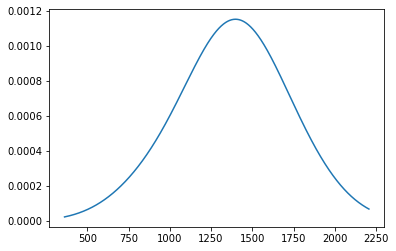

In [25]:
# Set lower and upper bound

bandwidth = df['Sales'].std()/(df['Sales'].count()**(1/5))

lower = np.floor(df['Sales'].min() - 3*bandwidth)
upper = np.ceil(df['Sales'].max() + 3*bandwidth)

x = np.arange(lower, upper, step=1)

pmf = kde_dist.pdf(x)
pmf = pmf/sum(pmf)

plt.plot(x,pmf)

In [26]:
## Sum negative values

zero = 0 ==0

negative = x<0

# update the PMF at 0

pmf[zero] = pmf[zero] + pmf[negative].sum

# remove negative values

zero_arg = np.argmax(x==0)
pmf = pmf[zero_arg:]
x = x[zero_arg:].astype(int)

TypeError: unsupported operand type(s) for +: 'float' and 'builtin_function_or_method'

In [27]:
# return var attributes

def attributes(pmf, x):
    mu = sum(pmf*x)
    std = np.sqrt(sum(x**2*pmf) - sum(pmf*x)**2)
    return mu, std

d_mu, d_std = attributes(pmf,x)
